### Новый раздел

In [4]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3
!python -m pip install nemo_toolkit[all]



Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib.libs/libpng16-cfdb1654.so.16.21.0
    /usr/local/lib/python3.7/dist-packages/matplotlib.libs/libz-a147dcb0.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
y
  Successfully uninstalled matplotlib-3.2.2
     |████████████████████████████████| 13.1 MB 5.3 MB/s 
ERROR: pip's dependency 

     |████████████████████████████████| 2.7 MB 5.3 MB/s 
     |████████████████████████████████| 12.7 MB 34.5 MB/s 
     |████████████████████████████████| 235 kB 52.6 MB/s 
     |████████████████████████████████| 1.2 MB 43.0 MB/s 
     |████████████████████████████████| 109 kB 52.3 MB/s 
     |████████████████████████████████| 90 kB 6.6 MB/s 
     |████████████████████████████████| 541 kB 54.2 MB/s 
     |████████████████████████████████| 1.5 MB 23.7 MB/s 
     |████████████████████████████████| 42 kB 948 kB/s 
     |████████████████████████████████| 97 kB 6.3 MB/s 
     |████████████████████████████████| 329 kB 49.6 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 11.2 MB 38.2 MB/s 
     |████████████████████████████████| 1.7 MB 37.2 MB/s 
     |████████████████████████████████| 59 kB 6.1 MB/s 
     |████████████████████████████████| 47 kB 4.5 MB/s 
     |████████████████████████████████| 524 kB 41.9 MB/s 
     |███████████████████

In [5]:
import glob
import os
import subprocess
import tarfile
import wget

import librosa
import IPython.display as ipd



### Новый раздел

In [158]:
data_dir = '/content'
# Загрузка датасета Golos
def load(golos_url, fname):
  if not os.path.exists(os.path.join(data_dir, fname)):
      golos_path = wget.download(golos_url, os.path.join(data_dir, fname))
      print(f"Dataset downloaded at: {golos_path}")
  else:
      print("Tarfile already exists.")
      golos_path = os.path.join(data_dir, fname)
  return golos_path

golos_path = load("https://sc.link/Kqr", "test.tar")

if not os.path.exists(os.path.join(data_dir, '/test/')):
    tar = tarfile.open(golos_path)
    tar.extractall(path=data_dir)

Dataset downloaded at: /content/test.tar


In [7]:
import nemo
import nemo.collections.asr as nemo_asr

load("https://sc.link/ZMv", "QuartzNet15x5_golos.nemo")

# asr_model = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="stt_ru_quartznet15x5")

asr_model = nemo_asr.models.EncDecCTCModel.restore_from(os.path.join(data_dir, "QuartzNet15x5_golos.nemo"))

[NeMo W 2021-12-02 19:19:50 optimizers:50] Apex was not found. Using the lamb or fused_adam optimizer will error out.
################################################################################
### WARNING, path does not exist: KALDI_ROOT=/mnt/matylda5/iveselyk/Tools/kaldi-trunk
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################



Dataset downloaded at: /content/QuartzNet15x5_golos.nemo


[NeMo W 2021-12-02 19:19:58 modelPT:131] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: train/golos_and_mcv.jsonl
    sample_rate: 16000
    labels:
    - ' '
    - а
    - б
    - в
    - г
    - д
    - е
    - ж
    - з
    - и
    - й
    - к
    - л
    - м
    - н
    - о
    - п
    - р
    - с
    - т
    - у
    - ф
    - х
    - ц
    - ч
    - ш
    - щ
    - ъ
    - ы
    - ь
    - э
    - ю
    - я
    batch_size: 64
    trim_silence: false
    max_duration: 20.0
    min_duration: 0.1
    num_workers: 20
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    parser: ru
    
[NeMo W 2021-12-02 19:19:58 modelPT:138] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a

[NeMo I 2021-12-02 19:19:58 features:265] PADDING: 16
[NeMo I 2021-12-02 19:19:58 features:282] STFT using torch
[NeMo I 2021-12-02 19:20:12 save_restore_connector:149] Model EncDecCTCModel was successfully restored from /content/QuartzNet15x5_golos.nemo.


In [ ]:
# --- Building Manifest Files --- #
import json

# Function to build a manifest
def build_manifest(manifest_rel, manifest_abs):
    manifest_path = os.path.split(os.path.abspath(manifest_rel))[0]
    with open(manifest_rel, 'r') as fin:
        with open(manifest_abs, 'w') as fout:
            for line in fin:
                metadata = json.loads(line)
                metadata["audio_filepath"]=os.path.join(manifest_path, metadata["audio_filepath"])
                json.dump(metadata, fout)
                fout.write('\n')
                
# Building Manifests
print("******")
train_rel = os.path.join(data_dir, 'test/farfield/manifest.jsonl')
train_abs = os.path.join(data_dir, 'test/farfield/farfield.jsonl')
if not os.path.isfile(train_abs):
  build_manifest(train_rel, train_abs)
test_manifest = train_abs
print("test_manifest", test_manifest)

train_rel = os.path.join(data_dir, 'test/crowd/manifest.jsonl')
train_abs = os.path.join(data_dir, 'test/crowd/crowd.jsonl')
if not os.path.isfile(train_abs):
  build_manifest(train_rel, train_abs)
train_manifest = train_abs
print("train_manifest", train_manifest)

In [ ]:
import pytorch_lightning as pl

params_model = asr_model._cfg
params_model['train_ds']['parser']='base'
params_model['validation_ds']['parser']='base'
params_model['test_ds']['parser']='base'
params_model['train_ds']['manifest_filepath'] = train_manifest
params_model['train_ds']['batch_size']=16
params_model['validation_ds']['manifest_filepath'] = test_manifest
params_model['validation_ds']['batch_size']=16
params_model['test_ds']['manifest_filepath'] = test_manifest
params_model['test_ds']['batch_size']=16

params_model['optim']['lr'] = 0.0001

In [13]:
from omegaconf import DictConfig

first_asr_model = nemo_asr.models.EncDecCTCModel(cfg=DictConfig(params_model), trainer=trainer)

[NeMo I 2021-12-02 19:20:25 collections:173] Dataset loaded with 9990 files totalling 11.17 hours
[NeMo I 2021-12-02 19:20:25 collections:174] 4 files were filtered totalling 0.03 hours


[NeMo W 2021-12-02 19:20:25 nemo_logging:349] /usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
      cpuset_checked))
    


[NeMo I 2021-12-02 19:20:25 collections:173] Dataset loaded with 1916 files totalling 1.41 hours
[NeMo I 2021-12-02 19:20:25 collections:174] 0 files were filtered totalling 0.00 hours
[NeMo I 2021-12-02 19:20:25 collections:173] Dataset loaded with 1916 files totalling 1.41 hours
[NeMo I 2021-12-02 19:20:25 collections:174] 0 files were filtered totalling 0.00 hours
[NeMo I 2021-12-02 19:20:25 features:265] PADDING: 16
[NeMo I 2021-12-02 19:20:25 features:282] STFT using torch


In [135]:
first_asr_model.cuda()

wer_nums = []
wer_denoms = []
for test_batch in first_asr_model.test_dataloader():
    test_batch = [x.cuda() for x in test_batch]
    targets = test_batch[2]
    targets_lengths = test_batch[3]        
    log_probs, encoded_len, greedy_predictions = first_asr_model(
        input_signal=test_batch[0], input_signal_length=test_batch[1]
    )
    first_asr_model._wer.update(greedy_predictions, targets, targets_lengths)
    _, wer_num, wer_denom = first_asr_model._wer.compute()
    first_asr_model._wer.reset()
    wer_nums.append(wer_num.detach().cpu().numpy())
    wer_denoms.append(wer_denom.detach().cpu().numpy())

    del test_batch, log_probs, targets, targets_lengths, encoded_len, greedy_predictions

print(f"WER = {sum(wer_nums)/sum(wer_denoms)}")

[NeMo W 2021-12-02 20:50:11 nemo_logging:349] /usr/local/lib/python3.7/dist-packages/nemo/collections/asr/parts/submodules/jasper.py:280: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
      ) // self.conv.stride[0] + 1
    


WER = 1.0481985206394655


## Смотрим на то как предобученная модель справляется с обучающей выборкой

**Найти зависимость того, насколько хорошо модель справляется с транскрипцие от характеристик слов не получилось**

In [39]:
import editdistance
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


device = 'cuda'

In [126]:
texts = []
paths = []
with open(train_abs, 'r') as fin:
  for line in fin:
      metadata = json.loads(line)
      texts.append(metadata['text'])
      paths.append(metadata['audio_filepath'])

texts, paths = np.array(texts), np.array(paths)
trs = np.array(asr_model.transcribe(paths2audio_files=paths))

In [145]:
edit_d = [(editdistance.eval(tr, w), editdistance.eval(tr.split(), w.split())) for tr,w in zip(trs, texts)]

In [158]:
char_ed = np.array(edit_d).T[0]
word_ed = np.array(edit_d).T[1]
correct_pairs = np.where(char_ed==0)[0]#, 1, 0)
incorrect_pairs = np.where(char_ed!=0)[0]#, 1, 0)

max_word_len = np.array([max([len(w) for w in item.split()]) if len(item.split()) else 0 for item in texts])
avg_word_len = np.array([np.average([len(w) for w in item.split()]) if len(item.split()) else 0 for item in texts[unempty_texts]])


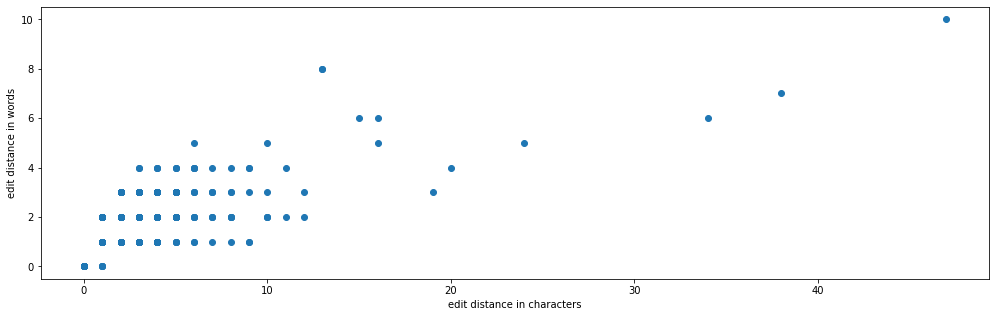

In [131]:
plt.figure(figsize=(17,5))
plt.scatter(char_ed, word_ed)
plt.xlabel('edit distance in characters')
plt.ylabel('edit distance in words')
plt.show()

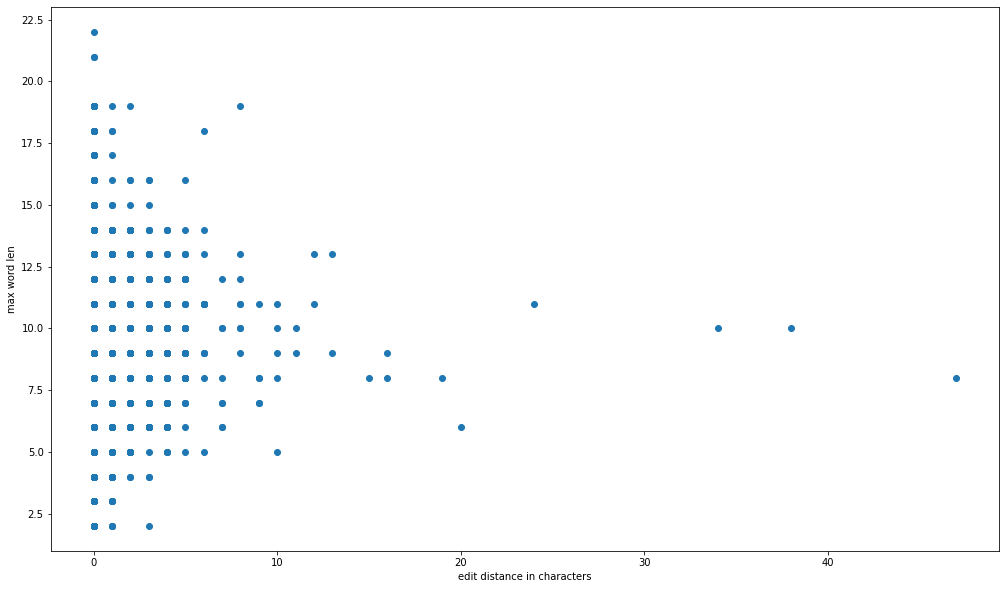

In [132]:
plt.figure(figsize=(17,10))
plt.scatter(char_ed, max_word_len)
plt.xlabel('edit distance in characters')
plt.ylabel('max word len')
plt.show()

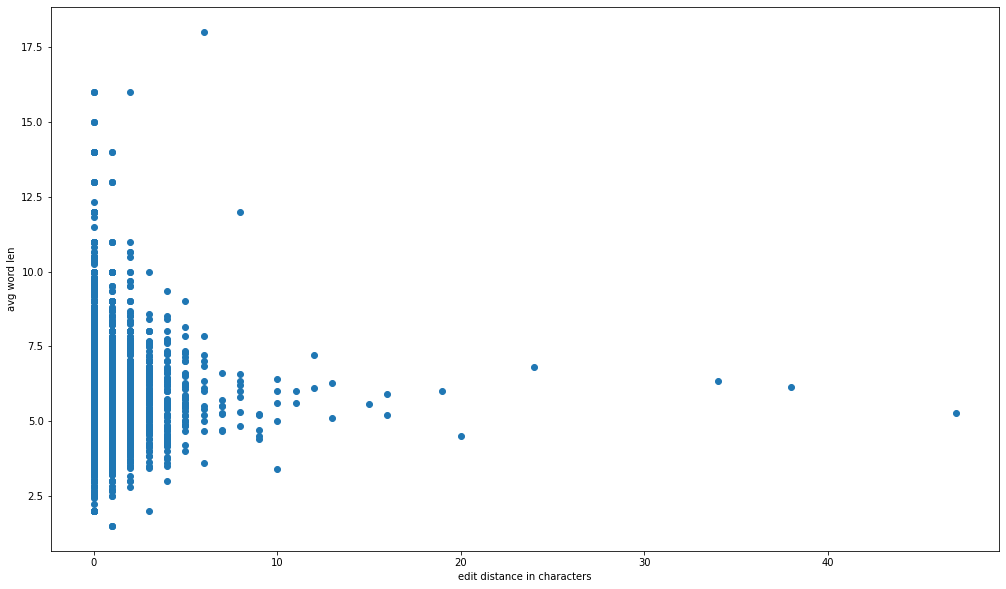

In [133]:
plt.figure(figsize=(17,10))
plt.scatter(char_ed, avg_word_len)
plt.xlabel('edit distance in characters')
plt.ylabel('avg word len')
plt.show()

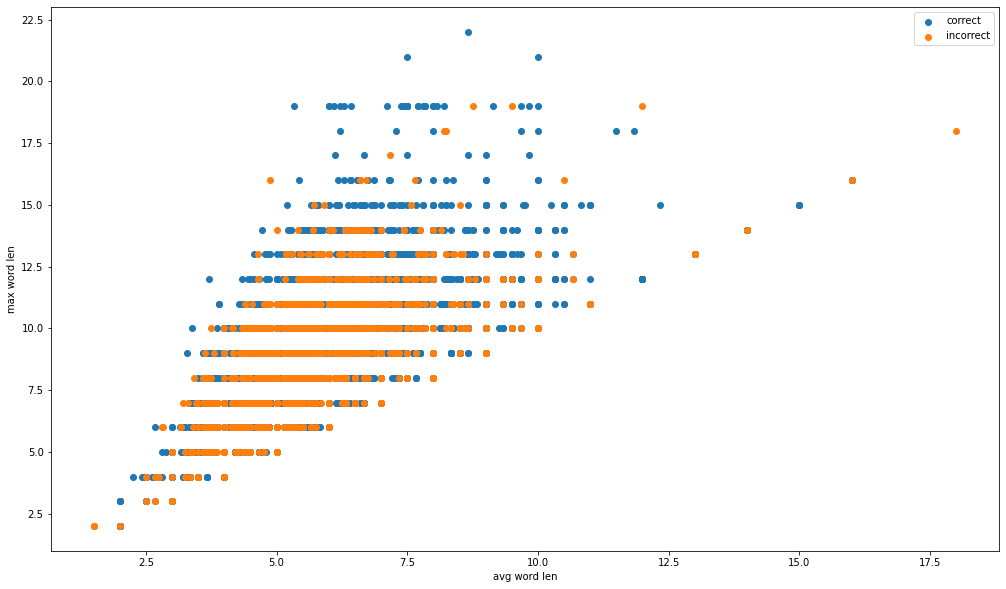

In [134]:
plt.figure(figsize=(17,10))
plt.scatter(avg_word_len[correct_pairs], max_word_len[correct_pairs], label='correct')
plt.scatter(avg_word_len[incorrect_pairs], max_word_len[incorrect_pairs], label='incorrect')
plt.xlabel('avg word len')
plt.ylabel('max word len')
plt.legend()
plt.show()

## Попробуем просто отрезать такие объекты, с которыми модель уже хорошо справляется, и оставить сложные случаи

In [160]:
def rebuild_manifest(manifest_rel, manifest_abs, indices):
    manifest_path = os.path.split(os.path.abspath(manifest_rel))[0]
    with open(manifest_rel, 'r') as fin:
        with open(manifest_abs, 'w') as fout:
          i =0
          for line in fin:
              if i in indices:
                metadata = json.loads(line)
                metadata["audio_filepath"]=os.path.join(manifest_path, metadata["audio_filepath"])
                json.dump(metadata, fout)
                fout.write('\n')
              i+=1
                
train_rel = os.path.join(data_dir, 'test/crowd/crowd.jsonl')
train_abs = os.path.join(data_dir, 'test/crowd/new_crowd.jsonl')
if not os.path.isfile(train_abs):
  build_manifest(train_rel, train_abs)
train_manifest = train_abs
print("train_manifest", train_manifest)

train_manifest /content/test/crowd/new_crowd.jsonl


In [ ]:
trainer = pl.Trainer(gpus=1, max_epochs=3, precision=16)

params_model['train_ds']['parser']='base'
params_model['validation_ds']['parser']='base'
params_model['test_ds']['parser']='base'
params_model['train_ds']['manifest_filepath'] = train_manifest
params_model['train_ds']['batch_size']=16
params_model['validation_ds']['manifest_filepath'] = test_manifest
params_model['validation_ds']['batch_size']=16
params_model['test_ds']['manifest_filepath'] = test_manifest
params_model['test_ds']['batch_size']=16

params_model['optim']['lr'] = 0.0001

In [ ]:
trainer.fit(first_asr_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[NeMo W 2021-12-02 21:38:52 modelPT:471] The lightning trainer received accelerator: <pytorch_lightning.accelerators.gpu.GPUAccelerator object at 0x7fdc98c58e10>. We recommend to use 'ddp' instead.


[NeMo I 2021-12-02 21:38:52 modelPT:561] Optimizer config = Novograd (
    Parameter Group 0
        amsgrad: False
        betas: [0.9, 0.98]
        eps: 1e-08
        grad_averaging: False
        lr: 0.0001
        weight_decay: 0.001
    )
[NeMo I 2021-12-02 21:38:52 lr_scheduler:752] Scheduler "<nemo.core.optim.lr_scheduler.CosineAnnealing object at 0x7fdc92533e90>" 
    will be used during training (effective maximum steps = 625) - 
    Parameters : 
    (warmup_steps: 500
    warmup_ratio: null
    min_lr: 0.0
    last_epoch: -1
    max_steps: 625
    )



  | Name              | Type                              | Params
------------------------------------------------------------------------
0 | preprocessor      | AudioToMelSpectrogramPreprocessor | 0     
1 | encoder           | ConvASREncoder                    | 18.9 M
2 | decoder           | ConvASRDecoder                    | 34.9 K
3 | loss              | CTCLoss                           | 0     
4 | spec_augmentation | SpectrogramAugmentation           | 0     
5 | _wer              | WER                               | 0     
------------------------------------------------------------------------
18.9 M    Trainable params
0         Non-trainable params
18.9 M    Total params
37.859    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

[NeMo W 2021-12-02 21:38:54 nemo_logging:349] /usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
      cpuset_checked))
    
[NeMo W 2021-12-02 21:38:56 nemo_logging:349] /usr/local/lib/python3.7/dist-packages/nemo/collections/asr/parts/submodules/jasper.py:280: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b

Training: 0it [00:00, ?it/s]

[NeMo W 2021-12-02 21:39:01 nemo_logging:349] /usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
      "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
    


In [ ]:
first_asr_model.cuda()

wer_nums = []
wer_denoms = []
for test_batch in first_asr_model.test_dataloader():
    test_batch = [x.cuda() for x in test_batch]
    targets = test_batch[2]
    targets_lengths = test_batch[3]        
    log_probs, encoded_len, greedy_predictions = first_asr_model(
        input_signal=test_batch[0], input_signal_length=test_batch[1]
    )
    first_asr_model._wer.update(greedy_predictions, targets, targets_lengths)
    _, wer_num, wer_denom = first_asr_model._wer.compute()
    first_asr_model._wer.reset()
    wer_nums.append(wer_num.detach().cpu().numpy())
    wer_denoms.append(wer_denom.detach().cpu().numpy())

    del test_batch, log_probs, targets, targets_lengths, encoded_len, greedy_predictions

print(f"WER = {sum(wer_nums)/sum(wer_denoms)}")